In [204]:
import pandas as pd
import numpy as np


# 3) Data Cleaning

In [205]:
df = pd.read_csv("dsjobs.csv")

In [206]:
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


In [207]:
df.isna().sum()

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [208]:
df["Rating"].unique(), df["Size"].unique(), len(df['Location'].unique())
#There is a -1 in the rating which could suggest that the row which has -1 as a rating dosen't have a rating to begin with

(array([ 3.1,  4.2,  3.8,  3.5,  2.9,  3.9,  4.4,  3.6,  4.5,  4.7,  3.7,
         3.4,  4.1,  3.2,  4.3,  2.8,  5. ,  4.8,  3.3,  2.7,  2.2,  2.6,
         4. ,  2.5,  4.9,  2.4, -1. ,  2.3,  4.6,  3. ,  2.1,  2. ]),
 array(['1001 to 5000 employees', '5001 to 10000 employees',
        '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
        '201 to 500 employees', '1 to 50 employees', '-1', 'Unknown'],
       dtype=object),
 207)

### a) Rereading to have NA values read properly

In [209]:
#Let's explore what other value have NA value which are not read properly, I saw -1 again in columns like hq, size, founded, Industry, sector and more so let's just read csv with -1 and "unknown" as a na values.
df = pd.read_csv("dsjobs.csv", na_values=["-1","Unknown"])

In [210]:
df.isna().sum()

index                  0
Job Title              0
Salary Estimate        0
Job Description        0
Rating                50
Company Name           0
Location               0
Headquarters          31
Size                  44
Founded              118
Type of ownership     31
Industry              71
Sector                71
Revenue               27
Competitors          501
dtype: int64

## a. ii ) Since we have a lot of missing, we can't just drop them because if we dropped all NA observatiosn, then we would drop atleast 501 or more since competitors it self as 501 na values assuming "-1" means that there is none. Dropping 501 observations is like dropping almost 70 percent of all observations. I am choosing not to drop NA because then we wouldn't have enough data to analyze.

In [211]:
#let's look at the dtypes to make sure each column has the same varibale type as it is supposed to be.
df.dtypes

index                  int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded              float64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [212]:
df.rename(columns={'Location': 'State'}, inplace=True)
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'State', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [213]:
len(df['State'].unique())

207

In [214]:
def trim_state(df):
    df = df.split(",")
    if len(df) > 1:
        return df[1].strip()
    else:
        return df[0].strip()
df['State']= df['State'].apply(trim_state)


In [215]:
len(df['State'].unique()),df['State'].unique()

(45,
 array(['NY', 'VA', 'MA', 'CA', 'IL', 'MO', 'WA', 'DC', 'Remote', 'TN',
        'TX', 'PA', 'AZ', 'WI', 'GA', 'FL', 'United States', 'NE', 'KS',
        'NH', 'NJ', 'LA', 'OH', 'IN', 'MD', 'CO', 'Utah', 'New Jersey',
        'UT', 'OR', 'MI', 'SC', 'MS', 'AL', 'RI', 'IA', 'MN', 'OK', 'CT',
        'NC', 'Texas', 'DE', 'Anne Arundel', 'California', 'WV'],
       dtype=object))

In [216]:
# Let's fix up some states which have the full form name instead of the short form for simplicity. 
df.loc[df['State'] == "California", "State"] = "CA"
df.loc[df['State'] == "Texas", "State"] = "TX"
df.loc[df['State'] == "Utah", "State"] = "UT"
df.loc[df['State'] == "New Jersey", "State"] = "NJ"
df.loc[df['State'] == "Anne Arundel", "State"] = "MD"

# b) So we do have uncommon observation like state being "United States" and "Remote" and we will not use to answer our research question.

## Now that we changed location to States, we will now chanage the salary from a string and a range to a salary

In [217]:
def low_trim_salary(df):
    df = df.split("(")
    if len(df) > 1:
        df = df[0]
        low  = df.split("-")[0]
        return low
    else:
        return df
def high_trim_salary(df):
    df = df.split("(")
    if len(df) > 1:
        df = df[0]
        high  = df.split("-")[1]
        return high
    else:
        return df

In [218]:
df['low_estimate'] = df['Salary Estimate'].apply(low_trim_salary)
df['high_estimate'] = df['Salary Estimate'].apply(high_trim_salary)


In [219]:
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,State,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,low_estimate,high_estimate
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,NY,"New York, NY",1001 to 5000 employees,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",$137K,$171K
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,VA,"Herndon, VA",5001 to 10000 employees,1968.0,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),NaN,$137K,$171K
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,MA,"Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),NaN,$137K,$171K
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,MA,"Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",$137K,$171K
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,NY,"New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",$137K,$171K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,NJ,"Fort Lee, NJ",1001 to 5000 employees,1989.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,NaN,$105K,$167K
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,NaN,JKGT,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$105K,$167K
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,NaN,AccessHope,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$105K,$167K
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,CA,"Santa Clara, CA",1 to 50 employees,NaN,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),NaN,$105K,$167K


In [220]:
df['low_estimate'].unique(), df['high_estimate'].unique()

(array(['$137K', '$75K', '$79K', '$99K', '$90K', '$101K', '$56K', '$71K',
        '$91K', '$141K', '$145K', '$122K', '$112K', '$110K', '$124K',
        '$69K', '$31K', '$95K', '$212K', '$66K', '$128K', '$138K', '$80K',
        '$87K', '$92K', '$105K'], dtype=object),
 array(['$171K ', '$131K ', '$132K ', '$109K ', '$165K ', '$97K ',
        '$106K ', '$123K ', '$124K ', '$150K ', '$225K ', '$225K',
        '$147K ', '$146K ', '$116K ', '$163K ', '$198K ', '$133K ',
        '$56K ', '$119K ', '$331K ', '$112K ', '$201K ', '$158K ',
        '$141K ', '$155K ', '$167K '], dtype=object))

In [221]:
def remove_extras(df):
    df = df.replace("$"," ")
    df = df.replace("K"," ")
    df = df.strip()
    df = int(df)
    return df

In [222]:
df['low_estimate'] = df['low_estimate'].apply(remove_extras)

In [223]:
df['high_estimate'] = df['high_estimate'].apply(remove_extras)

In [224]:
df['Salary Estimate'] = (df['low_estimate'] + df['high_estimate'])/2

In [225]:
df.rename(columns={"Salary Estimate":"Salary"}, inplace = True)

In [226]:
df['high_estimate'].unique(), df['low_estimate'].unique(), df['Salary'].unique()

(array([171, 131, 132, 109, 165,  97, 106, 123, 124, 150, 225, 147, 146,
        116, 163, 198, 133,  56, 119, 331, 112, 201, 158, 141, 155, 167],
       dtype=int64),
 array([137,  75,  79,  99,  90, 101,  56,  71,  91, 141, 145, 122, 112,
        110, 124,  69,  31,  95, 212,  66, 128, 138,  80,  87,  92, 105],
       dtype=int64),
 array([154. , 103. , 105. , 115.5,  99.5, 133. ,  76.5,  92.5,  97. ,
        107. , 120.5, 183. , 185. , 113. , 134. , 114. , 136.5, 161. ,
        106. ,  43.5, 271.5,  89. , 164.5, 148. , 123.5, 136. ]))

In [227]:
df.dtypes

index                  int64
Job Title             object
Salary               float64
Job Description       object
Rating               float64
Company Name          object
State                 object
Headquarters          object
Size                  object
Founded              float64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
low_estimate           int64
high_estimate          int64
dtype: object

# 4) Let's now move to research 

## a) Research Question: What is the relationship between state and salary average?

Before doing so, let's drop the observations which have states which are either "United States" and "Remote" since they woudn't come under a state

In [228]:
df = df[(df['State'] != "United States") & (df['State'] != "Remote")]
df

,index,Job Title,Salary,Job Description,Rating,Company Name,State,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,low_estimate,high_estimate
0,0,Sr Data Scientist,154.0,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,NY,"New York, NY",1001 to 5000 employees,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137,171
1,1,Data Scientist,154.0,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,VA,"Herndon, VA",5001 to 10000 employees,1968.0,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),NaN,137,171
2,2,Data Scientist,154.0,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,MA,"Boston, MA",1001 to 5000 employees,1981.0,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),NaN,137,171
3,3,Data Scientist,154.0,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,MA,"Bad Ragaz, Switzerland",501 to 1000 employees,2000.0,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171
4,4,Data Scientist,154.0,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,NY,"New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,136.0,Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,NJ,"Fort Lee, NJ",1001 to 5000 employees,1989.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,NaN,105,167
668,668,Data Scientist,136.0,Job Description\nBecome a thought leader withi...,NaN,JKGT,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,167
669,669,Data Scientist,136.0,Join a thriving company that is changing the w...,NaN,AccessHope,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,167
670,670,Data Scientist,136.0,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,CA,"Santa Clara, CA",1 to 50 employees,NaN,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),NaN,105,167


In [229]:
df['State'].unique()

array(['NY', 'VA', 'MA', 'CA', 'IL', 'MO', 'WA', 'DC', 'TN', 'TX', 'PA',
       'AZ', 'WI', 'GA', 'FL', 'NE', 'KS', 'NH', 'NJ', 'LA', 'OH', 'IN',
       'MD', 'CO', 'UT', 'OR', 'MI', 'SC', 'MS', 'AL', 'RI', 'IA', 'MN',
       'OK', 'CT', 'NC', 'DE', 'WV'], dtype=object)

# b) Visualization

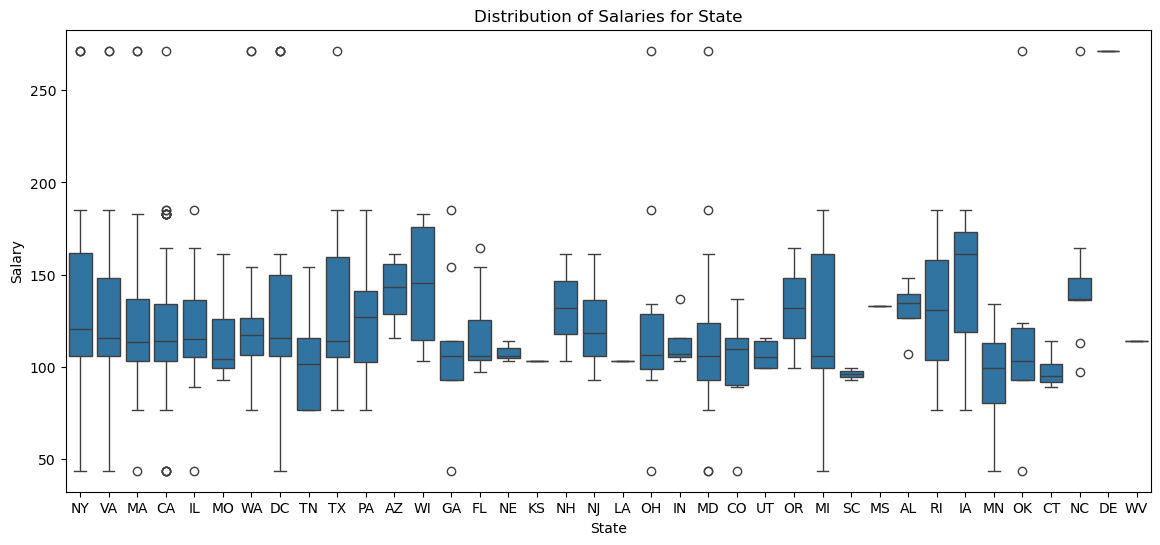

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (14,6))
sns.boxplot(x = 'State', y = "Salary", data = df)
plt.title("Distribution of Salaries for State")
plt.show()

# c) Statistics

In [231]:
df2 = df.groupby("State").agg("mean", numeric_only = True).reset_index()[['State','Salary']]
df2

,State,Salary
0,AL,131.125000
1,AZ,140.875000
2,CA,120.521084
3,CO,103.650000
4,CT,98.125000
5,DC,139.500000
6,DE,271.500000
7,FL,118.437500
8,GA,109.666667
9,IA,140.833333


## d) Looking at both the visualization and the mean salary for each state, we could see that there is a relationship between states and salary. If we compare states where the population is high like New York to Minnesota, we see that there is a big difference in the distribution of the salaries. The distribution of NY is much more spread than MN, NY has a higher median salary of 136k than MN's median salary of 94k, both distributions are skewed left. NY does have one outlier which is skewing the data set while MN doesn't.

# e) The visualization and the mean statistic for each country help answer the research question. Making a visualization that creates a boxplot for salary distribution helped us find that certain states had lower or higher average salaries compared to other states. This might be because of factors like cost of living and others. 